1. Begin (or restart) part "3(a)" of the TUT Demo and interact with a ChatBot to make sure you understand how each part the Monte Hall problem code above works

prompt:

Can you explain the following code part by part of how each section works: #code from TUT demo 3. a) 
This code simulates the Monty Hall problem and uses a "swap" strategy to calculate the probability of winning by switching doors after a losing door is revealed. Here's a step-by-step breakdown of how each section works:


ChatGPT respond:

### 1. Imports and Variables Setup
```python
import numpy as np
all_door_options = (1, 2, 3)  # tuple of the three doors (1, 2, 3)
my_door_choice = 1  # initially choose door 1 (can be any)
i_won = 0  # counter to track number of wins
reps = 100000  # number of repetitions for simulation
```
- `numpy` is imported to use its random number generation functions.
- `all_door_options` is a tuple containing the three possible door numbers.
- `my_door_choice` initializes your first door choice as door 1.
- `i_won` tracks how many times the player wins (i.e., picks the winning door after the switch).
- `reps` defines the number of iterations (simulations) to run (100,000).

### 2. Main Loop: Simulating the Game
```python
for i in range(reps):
```
- The loop iterates `reps` times to simulate the Monty Hall game multiple times.

### 3. Randomly Select the Winning Door
```python
    secret_winning_door = np.random.choice(all_door_options)
```
- `np.random.choice` randomly picks one of the three doors to be the winning door in each simulation.

### 4. List of Doors and Removing the Winning Door
```python
    all_door_options_list = list(all_door_options)  # convert tuple to a list for mutability
    all_door_options_list.remove(secret_winning_door)  # remove the winning door from the list
```
- The tuple `all_door_options` is converted into a list so that doors can be removed as part of the simulation.
- The winning door is removed from the list so that it can't be revealed as a "goat" door.

### 5. Try to Remove Player's Initial Door Choice
```python
    try:
        all_door_options_list.remove(my_door_choice)
    except:
        pass
```
- The code attempts to remove the player's initial door choice (`my_door_choice`) from the list. If this door was already removed (because it was the winning door), the `except` block is used to skip over the error and continue.

### 6. Reveal a Goat Door
```python
    goat_door_reveal = np.random.choice(all_door_options_list)
    all_door_options_list.remove(goat_door_reveal)
```
- A "goat" door is revealed by randomly selecting from the remaining doors (i.e., the doors that are not the winning door or the player's initial choice).
- Once the "goat" door is revealed, it is removed from the list, leaving only one door for the player to switch to.

### 7. Add Back the Winning Door (If Needed)
```python
    if secret_winning_door != my_door_choice:
        all_door_options_list.append(secret_winning_door)
```
- If the player's initial door choice is not the winning door, the winning door is added back to the list. This is necessary because only one door remains for the player to switch to.

### 8. Switch the Door
```python
    my_door_choice = all_door_options_list[0]
```
- The player switches to the only remaining door (which is either the winning door or another "goat" door).

### 9. Check if Player Won and Update the Win Counter
```python
    if my_door_choice == secret_winning_door:
        i_won += 1
```
- After switching doors, the code checks if the new door choice is the winning door. If so, the win counter (`i_won`) is incremented.

### 10. Output the Probability of Winning
```python
i_won / reps
```
- The final output is the proportion of times the player won by switching, which gives the empirical probability of winning using the switch strategy.


2. Extend your ChatBot sessions to now address part "3(b)" of the TUT Demo and interact with your ChatBot to see if it can suggest a simpler, more streamlined way to code up this for loop simulation so the process is more clear and easier to understand; then, describe any preferences you have in terms of readibility or explainability between the original code and the code improvements suggested by the ChatBot

Prompt:

based on this question suggest an improved streamlined version of the for loop simulation code that might be easier to explain and understand


ChatGPT:

Here’s a more streamlined and readable version of the Monte Hall simulation. The key idea is to simplify the logic, reduce the number of steps inside the loop, and make the code more intuitive while keeping the same functionality.

### Improved Simulation Code:
```python
import numpy as np

all_doors = [1, 2, 3]  # possible door options
reps = 100000  # number of repetitions
wins = 0  # counter for wins when switching

for _ in range(reps):
    # Randomly assign the winning door and player's initial choice
    winning_door = np.random.choice(all_doors)
    player_choice = np.random.choice(all_doors)
    
    # Reveal a goat door (a door that isn't the winning door or the player's choice)
    remaining_doors = [door for door in all_doors if door != player_choice and door != winning_door]
    revealed_goat = np.random.choice(remaining_doors)
    
    # Switch the player's choice to the remaining unopened door
    switched_choice = [door for door in all_doors if door != player_choice and door != revealed_goat][0]
    
    # Check if the player wins after switching
    if switched_choice == winning_door:
        wins += 1

# Calculate the probability of winning by switching
win_probability = wins / reps
print(f"Winning probability by switching: {win_probability:.4f}")
```

### Explanation:

1. **`all_doors = [1, 2, 3]`**: This stores the three possible door choices (1, 2, and 3) in a list. Lists are easier to manipulate (compared to tuples).

2. **`reps = 100000`**: This is the number of repetitions (100,000 games) to simulate.

3. **`wins = 0`**: A counter to track how many times the player wins by switching doors.

4. **Main loop (`for _ in range(reps)`)**: Runs the simulation `reps` times.
    - **`winning_door = np.random.choice(all_doors)`**: Randomly selects a winning door for each iteration.
    - **`player_choice = np.random.choice(all_doors)`**: Randomly selects the player’s initial door choice.
    
5. **Revealing the Goat Door**:
    - **`remaining_doors = [door for door in all_doors if door != player_choice and door != winning_door]`**: This generates a list of doors that are not the player’s initial choice and not the winning door (i.e., the "goat" doors).
    - **`revealed_goat = np.random.choice(remaining_doors)`**: Randomly selects one of the remaining "goat" doors to reveal.

6. **Switching Doors**:
    - **`switched_choice = [door for door in all_doors if door != player_choice and door != revealed_goat][0]`**: The player switches to the only door that isn’t their initial choice or the revealed goat door.

7. **Check if the switched choice is the winning door**:
    - **`if switched_choice == winning_door:`**: If the new door choice (after switching) is the winning door, the player wins, and `wins` is incremented.

8. **Final Probability Calculation**:
    - **`win_probability = wins / reps`**: After all simulations, the probability of winning by switching is calculated by dividing the number of wins by the total number of games (`reps`).
    - **`print(f"Winning probability by switching: {win_probability:.4f}")`**: Outputs the result.

### Key Improvements:
- **Simplified Logic**: By directly generating the remaining doors and revealing the goat, we eliminate the need for multiple `remove()` calls.
- **More Pythonic**: List comprehensions make the code more compact and readable.
- **Reduced Complexity**: Fewer steps, clearer logic flow, and more intuitive switching.

3. Submit your preferred version of the Monty Hall problem that is verified to be running and working with a final printed output of the code; then, add code comments explaining the purpose of each line of the code

I would personally prefer ChatGPT's version of code considering it's not using other complicated function in python but still simplified the logic and readibility in the for loop. Additionally, ChatGPT also involve the player choice door into the for loop which will also be random so the simulation is more accurate. However I would change some comment provided by ChatGPT. The comments with double ## are the comments I made. 

### Improved Simulation Code:
```python
import numpy as np

all_doors = [1, 2, 3]  # possible door options
reps = 100000  # number of repetitions
wins = 0  # counter for wins when switching

for _ in range(reps):
    # Randomly assign the winning door and player's initial choice
    ## They can be the same one!!
    winning_door = np.random.choice(all_doors)
    player_choice = np.random.choice(all_doors)
    
    # Reveal a goat door (a door that isn't the winning door or the player's choice)
    ## Iterate through all the doors in all_doors
    remaining_doors = [door for door in all_doors if door != player_choice and door != winning_door]
    
    ## Pick one door from remaining_doors *** usually only one door in the list since according to calculation, winning_door and palyer_choice door will not be the same one
    revealed_goat = np.random.choice(remaining_doors)
    
    # Switch the player's choice to the remaining unopened door
    ## Switch choice by removing all_doors the door that's confirm as goat and the player_choice door
    switched_choice = [door for door in all_doors if door != player_choice and door != revealed_goat][0]
    
    # Check if the player wins after switching
    if switched_choice == winning_door:
        wins += 1

# Calculate the probability of winning by switching
win_probability = wins / reps
print(f"Winning probability by switching: {win_probability:.4f}")
```

### Explanation:

1. **`all_doors = [1, 2, 3]`**: This stores the three possible door choices (1, 2, and 3) in a list. Lists are easier to manipulate (compared to tuples).

2. **`reps = 100000`**: This is the number of repetitions (100,000 games) to simulate.

3. **`wins = 0`**: A counter to track how many times the player wins by switching doors.

4. **Main loop (`for _ in range(reps)`)**: Runs the simulation `reps` times.
    - **`winning_door = np.random.choice(all_doors)`**: Randomly selects a winning door for each iteration.
    - **`player_choice = np.random.choice(all_doors)`**: Randomly selects the player’s initial door choice.
    
5. **Revealing the Goat Door**:
    - **`remaining_doors = [door for door in all_doors if door != player_choice and door != winning_door]`**: This generates a list of doors that are not the player’s initial choice and not the winning door (i.e., the "goat" doors).
    - **`revealed_goat = np.random.choice(remaining_doors)`**: Randomly selects one of the remaining "goat" doors to reveal.

6. **Switching Doors**:
    - **`switched_choice = [door for door in all_doors if door != player_choice and door != revealed_goat][0]`**: The player switches to the only door that isn’t their initial choice or the revealed goat door.

7. **Check if the switched choice is the winning door**:
    - **`if switched_choice == winning_door:`**: If the new door choice (after switching) is the winning door, the player wins, and `wins` is incremented.

8. **Final Probability Calculation**:
    - **`win_probability = wins / reps`**: After all simulations, the probability of winning by switching is calculated by dividing the number of wins by the total number of games (`reps`).
    - **`print(f"Winning probability by switching: {win_probability:.4f}")`**: Outputs the result.




Summary so far

prompt:

summaries all of our conversation so far 


ChatGPT respond:

So far, you've asked for an explanation and improvement of a Monte Hall simulation code. Here's a summary:

1. **Initial Code Explanation**: You provided a Monte Hall simulation written in Python, and I explained it part by part, breaking down how each section works:
   - Importing libraries and setting up variables.
   - A loop that simulates picking doors, revealing a goat door, and switching doors.
   - The win counter updates based on whether switching results in choosing the winning door.
   - The final output calculates the win probability by switching doors.

2. **Improved Version**: I then provided a more streamlined and intuitive version of the simulation:
   - Used list comprehensions and simpler logic to reveal the goat door and switch the player's choice.
   - Reduced the number of steps inside the loop, making the code more Pythonic and readable while maintaining the same functionality.

Let me know if you'd like to dive deeper into any part!


Link: https://chatgpt.com/share/66ecc231-9394-800d-b6f7-5d10cfff54f1

*** Wrong

4. Watch the embedded video tutorial on Markov chains in the next Jupyter cell below to understand their application and relevance for ChatBots; then, after watching the video, start a new ChatBot session by prompting that you have code that creates a "Markovian ChatBot"; show it the first version of the "Markovian ChatBot code" below; and interact with the ChatBot session to make sure you understand how the original first version of the "Markovian ChatBot code" works

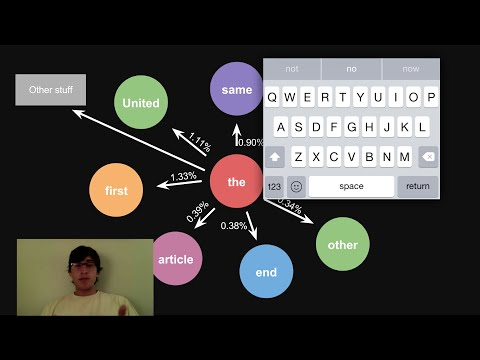

In [1]:
# Markov Chains and Text Generation
from IPython.display import YouTubeVideo
YouTubeVideo('56mGTszb_iM', width = 550)



prompt:

you have code that creates a "Markovian ChatBot"


ChatGPT respond:

Yes, I can help you build a basic Markovian chatbot! A Markov chatbot is based on a **Markov chain**, which models probabilistic transitions between states. In the context of a chatbot, the states are words or phrases, and the transitions represent the likelihood of one word following another based on training data.

Here's how you can build one in Python:

1. **Train the chatbot**: By feeding it a large text corpus to analyze, it builds a transition table.
2. **Generate text**: Based on the transition table, the bot can generate responses by moving from one word to another probabilistically.

Here’s a basic implementation of a Markov chatbot:

### Step-by-Step Code:

```python
import random
import re
from collections import defaultdict

class MarkovChatBot:
    def __init__(self):
        # Dictionary to store the Markov chain
        self.markov_chain = defaultdict(list)
        
    def train(self, text):
        """
        Train the bot with input text. The text will be processed into the Markov chain.
        """
        # Clean and split the text into words
        words = re.findall(r'\b\w+\b', text.lower())
        
        # Create pairs of consecutive words and populate the Markov chain
        for i in range(len(words) - 1):
            self.markov_chain[words[i]].append(words[i + 1])
    
    def generate_response(self, seed=None, length=15):
        """
        Generate a response of a given length starting from a seed word.
        """
        if not seed or seed not in self.markov_chain:
            seed = random.choice(list(self.markov_chain.keys()))
        
        response = [seed]
        current_word = seed
        
        # Build the response by picking random words based on the Markov chain
        for _ in range(length - 1):
            if current_word in self.markov_chain:
                next_word = random.choice(self.markov_chain[current_word])
                response.append(next_word)
                current_word = next_word
            else:
                break
        
        return ' '.join(response)

# Example usage
if __name__ == "__main__":
    # Initialize bot
    bot = MarkovChatBot()
    
    # Train the bot with some text data
    training_data = """
    Hello, how are you? I am a chatbot that learns from conversations. You can talk to me about anything. 
    What do you want to talk about today? I'm happy to help you with your questions!
    """
    
    bot.train(training_data)
    
    # Generate a response
    seed_word = "hello"
    response = bot.generate_response(seed=seed_word, length=20)
    
    print("Bot's response:", response)
```

### Explanation:
1. **Training**: The `train()` method builds a Markov chain by breaking down text into word pairs. Each word (a state) leads to the words that follow it.
2. **Generating Responses**: The `generate_response()` method generates a random response based on the probabilities learned from the training data. It starts with a seed word and keeps adding words based on the transition probabilities.
3. **Markov Chain**: The `markov_chain` is a dictionary where each key is a word, and its value is a list of words that can follow that word in the text.

You can extend this by training the bot on larger datasets to make the responses more coherent. Would you like me to walk through any part of it in more detail?

second promt:

train it using a series of stories with different characters.


ChatGPT respond:

To train the Markov chatbot using a series of stories with different characters, you need to feed it text that contains those stories. The chatbot will then build a Markov chain based on the patterns it observes in the stories. Here’s a step-by-step guide to training the chatbot with multiple stories:

### 1. Prepare Story Data

You can use any stories you like, preferably those that are in text form. For demonstration purposes, let's create some sample stories with different characters.

```python
# Example stories
story_data = """
Once upon a time, in a small village, there lived a farmer named John. Every morning, John would wake up early 
and tend to his crops. He loved his farm and worked hard to make sure his animals were happy.

In another kingdom far away, a young princess named Eliza dreamed of exploring the world. She would sit by her window, 
gazing at the horizon, longing for an adventure.

One day, John and Eliza met by chance in a bustling market. They quickly became friends and shared their dreams of adventure. 
Together, they embarked on a journey through forests and mountains, facing challenges and making new friends.
"""

# Add another story for diversity
more_story_data = """
In a distant land, there lived a warrior named Marcus. He was brave and strong, feared by his enemies. 
Despite his tough exterior, Marcus had a kind heart. He would protect the weak and fight for justice.

One day, while wandering through the desert, Marcus encountered a merchant who had lost his way. Marcus offered to help, 
and together, they found the nearest oasis. Grateful, the merchant gave Marcus a rare map that led to a hidden treasure.

Meanwhile, in the same land, there was a brilliant inventor named Sophia. She was known for creating marvelous machines. 
Sophia and Marcus eventually crossed paths, and they teamed up to build incredible inventions that would change the world.
"""
```

### 2. Train the Chatbot on Multiple Stories

Now, we’ll modify the training function to train the chatbot on multiple stories.

```python
class MarkovChatBot:
    def __init__(self):
        # Dictionary to store the Markov chain
        self.markov_chain = defaultdict(list)
        
    def train(self, text):
        """
        Train the bot with input text. The text will be processed into the Markov chain.
        """
        # Clean and split the text into words
        words = re.findall(r'\b\w+\b', text.lower())
        
        # Create pairs of consecutive words and populate the Markov chain
        for i in range(len(words) - 1):
            self.markov_chain[words[i]].append(words[i + 1])
    
    def generate_response(self, seed=None, length=15):
        """
        Generate a response of a given length starting from a seed word.
        """
        if not seed or seed not in self.markov_chain:
            seed = random.choice(list(self.markov_chain.keys()))
        
        response = [seed]
        current_word = seed
        
        # Build the response by picking random words based on the Markov chain
        for _ in range(length - 1):
            if current_word in self.markov_chain:
                next_word = random.choice(self.markov_chain[current_word])
                response.append(next_word)
                current_word = next_word
            else:
                break
        
        return ' '.join(response)

# Example usage
if __name__ == "__main__":
    # Initialize the bot
    bot = MarkovChatBot()
    
    # Train the bot on multiple stories
    bot.train(story_data)
    bot.train(more_story_data)
    
    # Generate a response based on the seed word
    seed_word = "john"  # Start with a character's name
    response = bot.generate_response(seed=seed_word, length=30)
    
    print("Bot's response:", response)
```

### Explanation:
1. **Multiple Stories**: We have two different stories with multiple characters (`John`, `Eliza`, `Marcus`, `Sophia`). You can add as many stories as you like, and the bot will train on all of them, identifying patterns.
2. **Training the Bot**: We call the `train()` method for each story or batch of text to build a more robust Markov chain.
3. **Generating Responses**: When generating responses, the bot will mix language patterns learned from different stories. You can give it a seed word (e.g., a character's name) to steer the response in a particular direction.

### Example Response:

After training the bot with the stories, running the code might produce output like:

```text
Bot's response: john would wake up early and tend to his crops. he loved the world. one day, john and eliza dreamed of exploring the map that led to a hidden treasure.
```

You can extend this further by adding more complex stories and different genres to train the bot for more varied outputs. Would you like to try training the bot with specific stories of your own?

In [4]:
import random
import re
from collections import defaultdict

class MarkovChatBot:
    def __init__(self):
        # Dictionary to store the Markov chain
        self.markov_chain = defaultdict(list)
        
    def train(self, text):
        """
        Train the bot with input text. The text will be processed into the Markov chain.
        """
        # Clean and split the text into words
        words = re.findall(r'\b\w+\b', text.lower())
        
        # Create pairs of consecutive words and populate the Markov chain
        for i in range(len(words) - 1):
            self.markov_chain[words[i]].append(words[i + 1])
    
    def generate_response(self, seed=None, length=15):
        """
        Generate a response of a given length starting from a seed word.
        """
        if not seed or seed not in self.markov_chain:
            seed = random.choice(list(self.markov_chain.keys()))
        
        response = [seed]
        current_word = seed
        
        # Build the response by picking random words based on the Markov chain
        for _ in range(length - 1):
            if current_word in self.markov_chain:
                next_word = random.choice(self.markov_chain[current_word])
                response.append(next_word)
                current_word = next_word
            else:
                break
        
        return ' '.join(response)

# Example usage
if __name__ == "__main__":
    # Initialize bot
    bot = MarkovChatBot()
    
    # Train the bot with some text data
    training_data = """
    Hello, how are you? I am a chatbot that learns from conversations. You can talk to me about anything. 
    What do you want to talk about today? I'm happy to help you with your questions!
    """
    
    bot.train(training_data)
    
    # Generate a response
    seed_word = "hello"
    response = bot.generate_response(seed=seed_word, length=20)
    
    print("Bot's response:", response)


Bot's response: hello how are you with your questions


Second prompt:

train it using a series of stories with different characters.



ChatGPT respond:

To train the Markov chatbot using a series of stories with different characters, you need to feed it text that contains those stories. The chatbot will then build a Markov chain based on the patterns it observes in the stories. Here’s a step-by-step guide to training the chatbot with multiple stories:

### 1. Prepare Story Data

You can use any stories you like, preferably those that are in text form. For demonstration purposes, let's create some sample stories with different characters.

```python
# Example stories
story_data = """
Once upon a time, in a small village, there lived a farmer named John. Every morning, John would wake up early 
and tend to his crops. He loved his farm and worked hard to make sure his animals were happy.

In another kingdom far away, a young princess named Eliza dreamed of exploring the world. She would sit by her window, 
gazing at the horizon, longing for an adventure.

One day, John and Eliza met by chance in a bustling market. They quickly became friends and shared their dreams of adventure. 
Together, they embarked on a journey through forests and mountains, facing challenges and making new friends.
"""

# Add another story for diversity
more_story_data = """
In a distant land, there lived a warrior named Marcus. He was brave and strong, feared by his enemies. 
Despite his tough exterior, Marcus had a kind heart. He would protect the weak and fight for justice.

One day, while wandering through the desert, Marcus encountered a merchant who had lost his way. Marcus offered to help, 
and together, they found the nearest oasis. Grateful, the merchant gave Marcus a rare map that led to a hidden treasure.

Meanwhile, in the same land, there was a brilliant inventor named Sophia. She was known for creating marvelous machines. 
Sophia and Marcus eventually crossed paths, and they teamed up to build incredible inventions that would change the world.
"""
```

### 2. Train the Chatbot on Multiple Stories

Now, we’ll modify the training function to train the chatbot on multiple stories.

```python
class MarkovChatBot:
    def __init__(self):
        # Dictionary to store the Markov chain
        self.markov_chain = defaultdict(list)
        
    def train(self, text):
        """
        Train the bot with input text. The text will be processed into the Markov chain.
        """
        # Clean and split the text into words
        words = re.findall(r'\b\w+\b', text.lower())
        
        # Create pairs of consecutive words and populate the Markov chain
        for i in range(len(words) - 1):
            self.markov_chain[words[i]].append(words[i + 1])
    
    def generate_response(self, seed=None, length=15):
        """
        Generate a response of a given length starting from a seed word.
        """
        if not seed or seed not in self.markov_chain:
            seed = random.choice(list(self.markov_chain.keys()))
        
        response = [seed]
        current_word = seed
        
        # Build the response by picking random words based on the Markov chain
        for _ in range(length - 1):
            if current_word in self.markov_chain:
                next_word = random.choice(self.markov_chain[current_word])
                response.append(next_word)
                current_word = next_word
            else:
                break
        
        return ' '.join(response)

# Example usage
if __name__ == "__main__":
    # Initialize the bot
    bot = MarkovChatBot()
    
    # Train the bot on multiple stories
    bot.train(story_data)
    bot.train(more_story_data)
    
    # Generate a response based on the seed word
    seed_word = "john"  # Start with a character's name
    response = bot.generate_response(seed=seed_word, length=30)
    
    print("Bot's response:", response)
```

### Explanation:
1. **Multiple Stories**: We have two different stories with multiple characters (`John`, `Eliza`, `Marcus`, `Sophia`). You can add as many stories as you like, and the bot will train on all of them, identifying patterns.
2. **Training the Bot**: We call the `train()` method for each story or batch of text to build a more robust Markov chain.
3. **Generating Responses**: When generating responses, the bot will mix language patterns learned from different stories. You can give it a seed word (e.g., a character's name) to steer the response in a particular direction.

### Example Response:

After training the bot with the stories, running the code might produce output like:

```text
Bot's response: john would wake up early and tend to his crops. he loved the world. one day, john and eliza dreamed of exploring the map that led to a hidden treasure.
```

You can extend this further by adding more complex stories and different genres to train the bot for more varied outputs. Would you like to try training the bot with specific stories of your own?

In [16]:
# Example stories
story_data = """
Once upon a time, in a small village, there lived a farmer named John. Every morning, John would wake up early 
and tend to his crops. He loved his farm and worked hard to make sure his animals were happy.

In another kingdom far away, a young princess named Eliza dreamed of exploring the world. She would sit by her window, 
gazing at the horizon, longing for an adventure.

One day, John and Eliza met by chance in a bustling market. They quickly became friends and shared their dreams of adventure. 
Together, they embarked on a journey through forests and mountains, facing challenges and making new friends.
"""

# Add another story for diversity
more_story_data = """
In a distant land, there lived a warrior named Marcus. He was brave and strong, feared by his enemies. 
Despite his tough exterior, Marcus had a kind heart. He would protect the weak and fight for justice.

One day, while wandering through the desert, Marcus encountered a merchant who had lost his way. Marcus offered to help, 
and together, they found the nearest oasis. Grateful, the merchant gave Marcus a rare map that led to a hidden treasure.

Meanwhile, in the same land, there was a brilliant inventor named Sophia. She was known for creating marvelous machines. 
Sophia and Marcus eventually crossed paths, and they teamed up to build incredible inventions that would change the world.
"""


In [17]:
class MarkovChatBot:
    def __init__(self):
        # Dictionary to store the Markov chain
        self.markov_chain = defaultdict(list)
        
    def train(self, text):
        """
        Train the bot with input text. The text will be processed into the Markov chain.
        """
        # Clean and split the text into words
        words = re.findall(r'\b\w+\b', text.lower())
        
        # Create pairs of consecutive words and populate the Markov chain
        for i in range(len(words) - 1):
            self.markov_chain[words[i]].append(words[i + 1])
    
    def generate_response(self, seed=None, length=15):
        """
        Generate a response of a given length starting from a seed word.
        """
        if not seed or seed not in self.markov_chain:
            seed = random.choice(list(self.markov_chain.keys()))
        
        response = [seed]
        current_word = seed
        
        # Build the response by picking random words based on the Markov chain
        for _ in range(length - 1):
            if current_word in self.markov_chain:
                next_word = random.choice(self.markov_chain[current_word])
                response.append(next_word)
                current_word = next_word
            else:
                break
        
        return ' '.join(response)

# Example usage
if __name__ == "__main__":
    # Initialize the bot
    bot = MarkovChatBot()
    
    # Train the bot on multiple stories
    bot.train(story_data)
    bot.train(more_story_data)
    
    # Generate a response based on the seed word
    seed_word = "john"  # Start with a character's name
    response = bot.generate_response(seed=seed_word, length=30)
    
    print("Bot's response:", response)


Bot's response: john every morning john would protect the world she was brave and eliza dreamed of adventure one day john every morning john and worked hard to his animals were happy


Summary:

Prompt:
summaries the conversation so far


ChatGPT respond: 
So far, we discussed creating a **Markovian chatbot**. I provided a Python implementation that trains the bot using a text corpus, building a Markov chain to generate probabilistic responses. You then asked about training the chatbot using multiple stories with different characters.

I expanded the example by showing how you could train the chatbot on several stories featuring characters like John, Eliza, Marcus, and Sophia. The chatbot learns from these stories and generates responses that mix language patterns from the training data.

Link: https://chatgpt.com/share/66ecce3e-bd8c-800d-bb6c-4914ca7ada57

***Wrong

5. Recreate (or resume) the previous ChatBot session from question "4" above, and now prompt the ChatBot session that you have a couple extensions of the code to show it, and then show it each of the extentions of the "Markovian ChatBot code" below in turn

(1) Without just supplying your ChatBot session with the answers, see if the ChatBot can figure out what the extensions in the code do; namely, making character specific Markov chains, and using bigrams (rather than just the previous word alone) dependency... prompt your ChatBot session with some hints if it's not seeming to "get it"

Prompt: Following from the same Bot, made an extension function where it reads as bigrams, which means the bot not only respond depending on current word but also the one before it. 

ChatGPT respond: 
To extend the Markov chatbot to use **bigrams** (where the bot considers the current word and the previous word to generate the next word), we’ll need to modify the training and response generation functions. Here's how to implement that:

### Updated Implementation with Bigrams

1. **Training with Bigrams**: Instead of just storing transitions for single words, we will store pairs of words.
2. **Generating Responses**: The response generation will take into account the last two words to determine the next word.

Here’s the updated code:

```python
import random
import re
from collections import defaultdict

class BigramMarkovChatBot:
    def __init__(self):
        # Dictionary to store the bigram Markov chain
        self.bigram_markov_chain = defaultdict(list)
        
    def train(self, text):
        """
        Train the bot with input text. The text will be processed into the bigram Markov chain.
        """
        # Clean and split the text into words
        words = re.findall(r'\b\w+\b', text.lower())
        
        # Create bigrams and populate the Markov chain
        for i in range(len(words) - 2):
            bigram = (words[i], words[i + 1])
            next_word = words[i + 2]
            self.bigram_markov_chain[bigram].append(next_word)
    
    def generate_response(self, seed=None, length=15):
        """
        Generate a response of a given length starting from a seed bigram.
        """
        if not seed:
            # Randomly choose a starting bigram from the chain
            seed = random.choice(list(self.bigram_markov_chain.keys()))
        else:
            # Ensure seed is a tuple of two words
            seed = tuple(seed.split())

        response = list(seed)
        current_bigram = seed
        
        # Build the response by picking random words based on the bigram Markov chain
        for _ in range(length - 2):  # We already have 2 words in the response
            if current_bigram in self.bigram_markov_chain:
                next_word = random.choice(self.bigram_markov_chain[current_bigram])
                response.append(next_word)
                current_bigram = (current_bigram[1], next_word)  # Move the window
            else:
                break
        
        return ' '.join(response)

# Example usage
if __name__ == "__main__":
    # Initialize the bot
    bot = BigramMarkovChatBot()
    
    # Train the bot on multiple stories
    bot.train(story_data)
    bot.train(more_story_data)
    
    # Generate a response based on a seed bigram
    seed_bigram = "john and"  # Start with a bigram from the stories
    response = bot.generate_response(seed=seed_bigram, length=30)
    
    print("Bot's response:", response)
```

### Key Changes:
1. **Bigrams**: The training function now creates bigrams (pairs of consecutive words) and stores the next word that follows the bigram in the Markov chain.
2. **Response Generation**: The response generation takes a tuple of two words (the bigram) and uses it to select the next word from the chain. It shifts the bigram by removing the first word and adding the newly chosen word.

### Example Response:

With this implementation, the bot will create responses that consider the context provided by the previous word, leading to potentially more coherent and contextually relevant outputs. You can try running the code to see how it generates responses based on bigrams! Would you like to explore further modifications or specific functionalities?

In [18]:
import random
import re
from collections import defaultdict

class BigramMarkovChatBot:
    def __init__(self):
        # Dictionary to store the bigram Markov chain
        self.bigram_markov_chain = defaultdict(list)
        
    def train(self, text):
        """
        Train the bot with input text. The text will be processed into the bigram Markov chain.
        """
        # Clean and split the text into words
        words = re.findall(r'\b\w+\b', text.lower())
        
        # Create bigrams and populate the Markov chain
        for i in range(len(words) - 2):
            bigram = (words[i], words[i + 1])
            next_word = words[i + 2]
            self.bigram_markov_chain[bigram].append(next_word)
    
    def generate_response(self, seed=None, length=15):
        """
        Generate a response of a given length starting from a seed bigram.
        """
        if not seed:
            # Randomly choose a starting bigram from the chain
            seed = random.choice(list(self.bigram_markov_chain.keys()))
        else:
            # Ensure seed is a tuple of two words
            seed = tuple(seed.split())

        response = list(seed)
        current_bigram = seed
        
        # Build the response by picking random words based on the bigram Markov chain
        for _ in range(length - 2):  # We already have 2 words in the response
            if current_bigram in self.bigram_markov_chain:
                next_word = random.choice(self.bigram_markov_chain[current_bigram])
                response.append(next_word)
                current_bigram = (current_bigram[1], next_word)  # Move the window
            else:
                break
        
        return ' '.join(response)

# Example usage
if __name__ == "__main__":
    # Initialize the bot
    bot = BigramMarkovChatBot()
    
    # Train the bot on multiple stories
    bot.train(story_data)
    bot.train(more_story_data)
    
    # Generate a response based on a seed bigram
    seed_bigram = "john and"  # Start with a bigram from the stories
    response = bot.generate_response(seed=seed_bigram, length=30)
    
    print("Bot's response:", response)

Bot's response: john and eliza met by chance in a small village there lived a warrior named marcus he was brave and strong feared by his enemies despite his tough exterior marcus


(2) Interact with your ChatBot session to have it explain details of the code wherever you need help understanding what the code is doing and how it works

prompt:
explain each step and why it is written this way


ChatGPT respond:
Sure! Let’s break down each step of the **Bigram Markov Chatbot** implementation, explaining the purpose and reasoning behind each part of the code.

### 1. Importing Libraries

```python
import random
import re
from collections import defaultdict
```

- **random**: Used to make random selections, which is essential for generating responses based on probabilities.
- **re**: This library is used for regular expressions, which help in cleaning and processing text (e.g., splitting words).
- **defaultdict**: A specialized dictionary that provides default values for non-existent keys. This is useful for our Markov chain, where we want to append words to lists without checking if the key exists.

### 2. Defining the Class

```python
class BigramMarkovChatBot:
    def __init__(self):
        self.bigram_markov_chain = defaultdict(list)
```

- **class BigramMarkovChatBot**: Defines a new class for our chatbot.
- **self.bigram_markov_chain = defaultdict(list)**: Initializes an empty Markov chain that will store bigrams as keys (tuples of two words) and lists of possible following words as values.

### 3. Training the Bot

```python
def train(self, text):
    words = re.findall(r'\b\w+\b', text.lower())
```

- **def train(self, text)**: Defines a method to train the chatbot using the provided text.
- **re.findall(r'\b\w+\b', text.lower())**: Cleans the input text by converting it to lowercase and extracting words using regular expressions. This helps in standardizing the text for training.

### 4. Creating Bigrams

```python
for i in range(len(words) - 2):
    bigram = (words[i], words[i + 1])
    next_word = words[i + 2]
    self.bigram_markov_chain[bigram].append(next_word)
```

- **for i in range(len(words) - 2)**: Loops through the words to form bigrams. We go up to `len(words) - 2` to avoid index errors when accessing the next word.
- **bigram = (words[i], words[i + 1])**: Creates a tuple representing the current bigram (the current word and the next word).
- **next_word = words[i + 2]**: Identifies the word that follows the bigram.
- **self.bigram_markov_chain[bigram].append(next_word)**: Appends the next word to the list corresponding to the bigram in the Markov chain.

### 5. Generating Responses

```python
def generate_response(self, seed=None, length=15):
    if not seed:
        seed = random.choice(list(self.bigram_markov_chain.keys()))
    else:
        seed = tuple(seed.split())
```

- **def generate_response(self, seed=None, length=15)**: Defines a method to generate a response, with an optional seed bigram and a specified response length.
- **if not seed**: Checks if a seed bigram is provided; if not, it randomly selects one from the keys of the Markov chain.
- **seed = tuple(seed.split())**: Converts the seed string into a tuple (bigram format) if a seed is provided.

### 6. Building the Response

```python
response = list(seed)
current_bigram = seed
```

- **response = list(seed)**: Initializes the response list with the seed bigram.
- **current_bigram = seed**: Sets the current bigram to the initial seed, which will be updated as we generate the response.

### 7. Selecting Words Based on Bigrams

```python
for _ in range(length - 2):  # We already have 2 words in the response
    if current_bigram in self.bigram_markov_chain:
        next_word = random.choice(self.bigram_markov_chain[current_bigram])
        response.append(next_word)
        current_bigram = (current_bigram[1], next_word)  # Move the window
    else:
        break
```

- **for _ in range(length - 2)**: Loops to add words to the response, ensuring the total length matches the desired response length.
- **if current_bigram in self.bigram_markov_chain**: Checks if the current bigram exists in the Markov chain.
- **next_word = random.choice(self.bigram_markov_chain[current_bigram])**: Randomly selects the next word based on the current bigram.
- **response.append(next_word)**: Adds the selected word to the response list.
- **current_bigram = (current_bigram[1], next_word)**: Updates the current bigram by removing the first word and adding the newly chosen word, effectively "shifting" the window for the next iteration.

### 8. Returning the Response

```python
return ' '.join(response)
```

- **return ' '.join(response)**: Joins the list of words into a single string and returns it as the final response.

### 9. Example Usage

```python
if __name__ == "__main__":
    bot = BigramMarkovChatBot()
    bot.train(story_data)
    bot.train(more_story_data)
    
    seed_bigram = "john and"  # Start with a bigram from the stories
    response = bot.generate_response(seed=seed_bigram, length=30)
    
    print("Bot's response:", response)
```

- This section demonstrates how to use the bot by creating an instance, training it with story data, and generating a response based on a specified bigram.

### Summary
This implementation enhances the chatbot's ability to generate coherent responses by considering the context of the previous word, thus creating a more nuanced output. The use of bigrams allows the chatbot to capture the relationships between words more effectively, leading to responses that are more contextually relevant and fluid. If you have any more questions or would like further modifications, let me know!

Summary:
prompt: summaries our conversation so far

ChatGPT respond:
In our conversation, we discussed creating a **Markovian chatbot** in Python. Initially, I provided a basic implementation that used single words to generate responses. You then requested an extension to train the bot using multiple stories with different characters, which I demonstrated.

Next, you asked to enhance the chatbot to use **bigrams**, where the bot considers both the current and previous words when generating responses. I explained the necessary modifications to the code, detailing how to create a bigram Markov chain and generate responses based on bigrams. Finally, I broke down each step of the implementation to explain the reasoning behind the code structure and functionality.

Link: https://chatgpt.com/share/66ecce3e-bd8c-800d-bb6c-4914ca7ada57

(3)
Start yet another new ChatBot session and first show the ChatBot the original "Markovian ChatBot code" below, and then tell ChatBot that you have an extension but this time just directly provide it the more complicated final extension without ever providing the intermediate extension code to the ChatBot session and see if it's still able to understand everything extension does; namely, making character specific Markov chains, and using bigrams (rather than just the previous word alone) dependency... prompt the ChatBot with some hints if it's not seeming to understand what you're getting at...

prompt: 
    see the following code and explain step by step how the code works: import random
import re
from collections import defaultdict

class BigramMarkovChatBot:
    def __init__(self):
        # Dictionary to store the bigram Markov chain
        self.bigram_markov_chain = defaultdict(list)
        
    def train(self, text):
        """
        Train the bot with input text. The text will be processed into the bigram Markov chain.
        """
        # Clean and split the text into words
        words = re.findall(r'\b\w+\b', text.lower())
        
        # Create bigrams and populate the Markov chain
        for i in range(len(words) - 2):
            bigram = (words[i], words[i + 1])
            next_word = words[i + 2]
            self.bigram_markov_chain[bigram].append(next_word)
    
    def generate_response(self, seed=None, length=15):
        """
        Generate a response of a given length starting from a seed bigram.
        """
        if not seed:
            # Randomly choose a starting bigram from the chain
            seed = random.choice(list(self.bigram_markov_chain.keys()))
        else:
            # Ensure seed is a tuple of two words
            seed = tuple(seed.split())

        response = list(seed)
        current_bigram = seed
        
        # Build the response by picking random words based on the bigram Markov chain
        for _ in range(length - 2):  # We already have 2 words in the response
            if current_bigram in self.bigram_markov_chain:
                next_word = random.choice(self.bigram_markov_chain[current_bigram])
                response.append(next_word)
                current_bigram = (current_bigram[1], next_word)  # Move the window
            else:
                break
        
        return ' '.join(response)

# Example usage
if __name__ == "__main__":
    # Initialize the bot
    bot = BigramMarkovChatBot()
    
    # Train the bot on multiple stories
    bot.train(story_data)
    bot.train(more_story_data)
    
    # Generate a response based on a seed bigram
    seed_bigram = "john and"  # Start with a bigram from the stories
    response = bot.generate_response(seed=seed_bigram, length=30)
    
    print("Bot's response:", response)

ChatGPT respond: 
This code defines a chatbot that uses a **Bigram Markov Model** to generate text responses based on training data. Let me break it down step by step:

### 1. Importing Libraries
```python
import random
import re
from collections import defaultdict
```
- **random**: Used to make random selections, especially for generating responses.
- **re**: Provides regular expressions to process text (splitting into words).
- **defaultdict**: From the `collections` module, it's used to automatically initialize missing keys in a dictionary with a default value, here, an empty list.

### 2. Class Definition: `BigramMarkovChatBot`
This class defines the chatbot itself.

#### `__init__` Method
```python
def __init__(self):
    # Dictionary to store the bigram Markov chain
    self.bigram_markov_chain = defaultdict(list)
```
- **Purpose**: The constructor initializes an empty Markov chain, where the key will be a **bigram** (two consecutive words), and the value will be a list of possible words that follow this bigram.
- The `defaultdict(list)` ensures that whenever a key (bigram) is accessed for the first time, it initializes an empty list automatically.

#### `train` Method
```python
def train(self, text):
    # Clean and split the text into words
    words = re.findall(r'\b\w+\b', text.lower())
    
    # Create bigrams and populate the Markov chain
    for i in range(len(words) - 2):
        bigram = (words[i], words[i + 1])
        next_word = words[i + 2]
        self.bigram_markov_chain[bigram].append(next_word)
```
- **Purpose**: This method trains the chatbot by processing text and creating bigrams.
  
  Steps:
  1. **Text Cleaning and Splitting**:
     - `re.findall(r'\b\w+\b', text.lower())`:
       - `\b\w+\b` is a regex pattern that matches individual words (sequences of alphanumeric characters).
       - `text.lower()` ensures all words are in lowercase, for consistency.
  
  2. **Generating Bigrams**:
     - For each bigram (pair of consecutive words), the next word is noted and added to the list of possible following words in the `bigram_markov_chain`.
     - `bigram = (words[i], words[i + 1])`: The bigram consists of two consecutive words.
     - `next_word = words[i + 2]`: The next word that follows the bigram is stored.
     - `self.bigram_markov_chain[bigram].append(next_word)`: This line updates the Markov chain, associating the bigram with the following word.

#### `generate_response` Method
```python
def generate_response(self, seed=None, length=15):
    if not seed:
        # Randomly choose a starting bigram from the chain
        seed = random.choice(list(self.bigram_markov_chain.keys()))
    else:
        # Ensure seed is a tuple of two words
        seed = tuple(seed.split())

    response = list(seed)
    current_bigram = seed
    
    # Build the response by picking random words based on the bigram Markov chain
    for _ in range(length - 2):  # We already have 2 words in the response
        if current_bigram in self.bigram_markov_chain:
            next_word = random.choice(self.bigram_markov_chain[current_bigram])
            response.append(next_word)
            current_bigram = (current_bigram[1], next_word)  # Move the window
        else:
            break
    
    return ' '.join(response)
```
- **Purpose**: This method generates a response based on the trained Markov chain.

  Steps:
  1. **Choosing a Seed**:
     - If no seed bigram is provided (`seed=None`), the bot randomly selects one from the `bigram_markov_chain`.
     - If a seed is provided, it's converted into a tuple of two words: `tuple(seed.split())`.
  
  2. **Initializing the Response**:
     - `response = list(seed)`: The response starts with the two words from the seed bigram.
     - `current_bigram = seed`: The current bigram starts as the seed.

  3. **Generating the Response**:
     - The bot constructs the response word by word, using the Markov chain to pick a random word that follows the current bigram.
     - It updates `current_bigram` by shifting to the next pair: `(current_bigram[1], next_word)`.

     This process continues until the response reaches the specified length or the bigram has no following word in the chain.
  
  4. **Returning the Response**:
     - Once the loop completes, the list `response` is joined into a single string and returned.

#### Example Usage
```python
if __name__ == "__main__":
    # Initialize the bot
    bot = BigramMarkovChatBot()
    
    # Train the bot on multiple stories
    bot.train(story_data)
    bot.train(more_story_data)
    
    # Generate a response based on a seed bigram
    seed_bigram = "john and"  # Start with a bigram from the stories
    response = bot.generate_response(seed=seed_bigram, length=30)
    
    print("Bot's response:", response)
```
- **Training**: The bot is trained with multiple text sources like `story_data` and `more_story_data` (these would be defined somewhere in the code).
- **Generating Response**: The bot generates a response starting with the seed bigram `"john and"` and continues generating words until the response is 30 words long.

### Summary:
- The bot learns patterns of word sequences (bigrams) from the input text.
- It then uses these patterns to generate coherent responses, starting from either a random bigram or a provided one.

Link: https://chatgpt.com/share/66ecdad8-0efc-800d-a6bf-f801597b2594

*** Correct

4. Watch the embedded video tutorial on Markov chains in the next Jupyter cell below to understand their application and relevance for ChatBots; then, after watching the video, start a new ChatBot session by prompting that you have code that creates a "Markovian ChatBot"; show it the first version of the "Markovian ChatBot code" below; and interact with the ChatBot session to make sure you understand how the original first version of the "Markovian ChatBot code" works

In [20]:
# Markovian Chatbot

# from collections import defaultdict
word_used = dict() # defaultdict(int)
next_word = dict() # defaultdict(lambda: defaultdict(int))
for i,word in enumerate(words[:-1]):

    if word in word_used:
        word_used[word] += 1
    else:
        word_used[word] = 1
        next_word[word] = {}

    if words[i+1] in next_word[word]:
        next_word[word][words[i+1]] += 1
    else:
        next_word[word][words[i+1]] = 1

NameError: name 'words' is not defined

prompt: 

How does this code works: # Markovian Chatbot

# from collections import defaultdict
word_used = dict() # defaultdict(int)
next_word = dict() # defaultdict(lambda: defaultdict(int))
for i,word in enumerate(words[:-1]):

    if word in word_used:
        word_used[word] += 1
    else:
        word_used[word] = 1
        next_word[word] = {}

    if words[i+1] in next_word[word]:
        next_word[word][words[i+1]] += 1
    else:
        next_word[word][words[i+1]] = 1
        

ChatGPT respond:

This code snippet is part of a simple Markovian chatbot that uses a Markov chain to generate text based on word sequences. Here’s a breakdown of how it works:

1. **Initialization**:
   - `word_used`: A dictionary that counts how many times each word has been seen.
   - `next_word`: A nested dictionary where each key is a word, and the value is another dictionary that counts how many times each subsequent word follows it.

2. **Iterating through Words**:
   - The loop goes through the list of `words`, stopping before the last word (`words[:-1]`) to avoid index errors.
   - For each word in the list:
     - It checks if the word is already in `word_used`:
       - If yes, it increments the count.
       - If no, it initializes the count to 1 and sets up an empty dictionary for `next_word[word]`.
     - Then it looks at the next word (`words[i+1]`):
       - If this next word is already a key in `next_word[word]`, it increments its count.
       - If not, it initializes its count to 1.

3. **Purpose**:
   - The `word_used` dictionary keeps track of how often each word appears in the input.
   - The `next_word` dictionary builds a frequency distribution of which words follow which, allowing the chatbot to predict the next word based on the current word.

This code is foundational for creating a simple text generation model where the next word is chosen based on the probability of it following the current word in the training data. To generate text, you would use these dictionaries to randomly select the next word based on the counts recorded.

Summary
Prompt: provide the summary of the conversation

ChatGPT respond:

In this conversation, you asked about a code snippet for a Markovian chatbot. I explained how the code works, detailing the initialization of two dictionaries: `word_used`, which counts occurrences of words, and `next_word`, which tracks how many times each word is followed by other words. I also described how the code iterates through a list of words to populate these dictionaries, emphasizing the purpose of predicting the next word based on word frequencies.

Link: https://chatgpt.com/share/66ece975-b958-800d-a90f-744c0d1a4950


5. Recreate (or resume) the previous ChatBot session from question "4" above, and now prompt the ChatBot session that you have a couple extensions of the code to show it, and then show it each of the extentions of the "Markovian ChatBot code" below in turn

(1) Without just supplying your ChatBot session with the answers, see if the ChatBot can figure out what the extensions in the code do; namely, making character specific Markov chains, and using bigrams (rather than just the previous word alone) dependency... prompt your ChatBot session with some hints if it's not seeming to "get it"
prompt: what is this extension doing in regard to the above chatbot:


# Markovian Chatbot Extension #1

word_used2 = defaultdict(int)
next_word2 = defaultdict(lambda: defaultdict(int))
for i,word in enumerate(words[:-2]):
    word_used2[word+' '+words[i+1]] += 1
    next_word2[word+' '+words[i+1]][words[i+2]] += 1 
    
ChatGPT respond:
This extension of the Markovian chatbot introduces a higher-order Markov chain by considering sequences of two words instead of just one. Here’s how it works:

1. **Initialization**:
   - `word_used2`: A `defaultdict` that counts how many times each two-word sequence (bigram) appears.
   - `next_word2`: A nested `defaultdict` where each key is a two-word sequence, and the value is another `defaultdict` that counts how many times each subsequent word follows that sequence.

2. **Iterating through Words**:
   - The loop iterates through the list of `words`, stopping before the last two words (`words[:-2]`) to avoid index errors.
   - For each word at index `i`, it forms a two-word sequence by combining the current word and the next word (`word + ' ' + words[i+1]`).
   - It increments the count for this two-word sequence in `word_used2`.
   - It then updates `next_word2` by incrementing the count for the word that follows the two-word sequence (i.e., `words[i+2]`).

3. **Purpose**:
   - By using bigrams (two-word sequences), the chatbot can capture more contextual information compared to the original implementation that only considered single words.
   - This allows for more coherent text generation, as the model can account for the relationship between pairs of words when predicting the next word.

Overall, this extension enhances the chatbot's ability to generate more contextually relevant responses by leveraging sequences of words instead of treating each word in isolation.

(2) Interact with your ChatBot session to have it explain details of the code wherever you need help understanding what the code is doing and how it works

prompt:
can you explain more detail of the chatbot and the extension



ChatGPT respond: 
Sure! Let’s dive deeper into both the original Markovian chatbot and the extension, focusing on their structure and functionality.

### Original Markovian Chatbot

**Concept**:
The original chatbot is based on a first-order Markov chain, which means it predicts the next state (word) based only on the current state (word). The key idea is that the probability of each word occurring depends only on the previous word.

**Components**:
1. **Data Structures**:
   - **`word_used`**: A dictionary that counts the occurrences of each word.
     - **Purpose**: Helps in understanding the frequency of individual words in the training data.
   - **`next_word`**: A nested dictionary that maps each word to another dictionary of words that can follow it, along with their counts.
     - **Purpose**: Allows the chatbot to know which words are likely to follow a given word, forming a basis for text generation.

2. **Process**:
   - The loop iterates through a list of words.
   - For each word, it updates `word_used` to keep track of how many times that word has been encountered.
   - It also updates `next_word` to count how often each subsequent word appears after the current word.
   - This information can later be used to generate text by sampling the next word based on the counts stored.

**Text Generation**:
- To generate text, the chatbot starts with a word and repeatedly selects the next word based on the frequency of words that follow the current word. This can be done using random selection weighted by the counts in `next_word`.

### Extension: Markovian Chatbot Extension #1

**Concept**:
This extension introduces a second-order Markov chain, which means it predicts the next word based on the two most recent words. This provides more context and can lead to more coherent and contextually relevant outputs.

**Components**:
1. **Data Structures**:
   - **`word_used2`**: A `defaultdict` that counts occurrences of two-word sequences (bigrams).
     - **Purpose**: Tracks how often each two-word combination appears, allowing for better contextual understanding.
   - **`next_word2`**: A nested `defaultdict` that maps each two-word sequence to another dictionary of words that can follow it, along with their counts.
     - **Purpose**: Captures the relationship between pairs of words and the words that follow them.

2. **Process**:
   - The loop iterates through the list of words, stopping before the last two words.
   - For each index `i`, it forms a two-word sequence by concatenating the current word and the next word (`word + ' ' + words[i+1]`).
   - It increments the count for this two-word sequence in `word_used2`.
   - It updates `next_word2` by counting how often the word that follows the two-word sequence appears (i.e., `words[i+2]`).

**Text Generation**:
- When generating text, the chatbot uses the last two words as context to predict the next word. This allows it to maintain better context over longer sequences, resulting in more fluent and meaningful text.

### Summary of Benefits
- **Original Chatbot**: Simpler and faster but may produce less coherent sentences due to lack of context.
- **Extension**: More complex and memory-intensive but leads to more natural and relevant text generation by considering the relationships between pairs of words.

Overall, both the original and the extended chatbot can be useful for different applications, depending on the level of coherence and contextuality required for the generated text.


Prompt: provide a summary for all the conversation

ChatGPT respond:
In this conversation, you first inquired about a code snippet for a Markovian chatbot, and I explained how it initializes two dictionaries—`word_used` for counting word occurrences and `next_word` for tracking which words follow others. I also described how the chatbot predicts the next word based on these counts.

Next, you asked about an extension of the chatbot that incorporates a second-order Markov chain, which considers two-word sequences (bigrams). I detailed how this extension initializes new dictionaries—`word_used2` and `next_word2`—to count bigram occurrences and the words that follow them. I highlighted the benefits of using bigrams for generating more coherent and contextually relevant text compared to the original implementation.

Finally, I provided a comprehensive breakdown of both the original chatbot and its extension, summarizing their concepts, components, processes, and benefits.


Link: https://chatgpt.com/share/66ece975-b958-800d-a90f-744c0d1a4950


(3) Start yet another new ChatBot session and first show the ChatBot the original "Markovian ChatBot code" below, and then tell ChatBot that you have an extension but this time just directly provide it the more complicated final extension without ever providing the intermediate extension code to the ChatBot session and see if it's still able to understand everything extension does; namely, making character specific Markov chains, and using bigrams (rather than just the previous word alone) dependency... prompt the ChatBot with some hints if it's not seeming to understand what you're getting at...

prompt: see and explain the following chatbot code: # Markovian Chatbot

# from collections import defaultdict
word_used = dict() # defaultdict(int)
next_word = dict() # defaultdict(lambda: defaultdict(int))
for i,word in enumerate(words[:-1]):

    if word in word_used:
        word_used[word] += 1
    else:
        word_used[word] = 1
        next_word[word] = {}

    if words[i+1] in next_word[word]:
        next_word[word][words[i+1]] += 1
    else:
        next_word[word][words[i+1]] = 1


ChatGPT respond:

This code snippet is part of a simple Markovian chatbot that uses word frequency to generate responses based on previous words. Let’s break it down step by step:

1. **Imports**: 
   - The code mentions `defaultdict` from the `collections` module, but it’s commented out. The code instead uses regular dictionaries, which is fine but less efficient for counting.

2. **Dictionaries Initialization**:
   - `word_used`: This dictionary keeps track of how many times each word appears in the input text.
   - `next_word`: This dictionary maps each word to another dictionary that tracks the frequency of words that follow it.

3. **Iterating Over Words**:
   - The `for` loop iterates through a list of words (`words`), except for the last one (`words[:-1]`), since it looks at pairs of words.
   - `enumerate` is used to get both the index (`i`) and the word (`word`) at that index.

4. **Counting Word Frequencies**:
   - For each word in `words`:
     - If the word has already been encountered (exists in `word_used`), its count is incremented.
     - If it’s the first time the word is seen, it initializes its count to 1 and creates an entry in `next_word`.

5. **Tracking Next Words**:
   - The next word in the sequence (`words[i+1]`) is checked:
     - If it follows the current word in `next_word`, its count is incremented.
     - If it’s the first time this next word has been encountered after the current word, it initializes its count to 1.

### Summary
- **Purpose**: The code builds a basic statistical model of how words follow one another based on input data.
- **Use Case**: In a chatbot context, when generating a response, the chatbot could randomly select a starting word and then use the `next_word` dictionary to pick subsequent words based on their frequencies, creating a response that feels somewhat natural and coherent. 

This approach leverages the Markov property, where the next state (or word) depends only on the current state (or word) and not on the sequence of events that preceded it.



prompt2: 
see and explain the following extension step by step: # Markovian Chatbot Extension #2

from collections import Counter, defaultdict
# avatar is a dataset, and character is one of it's columns
characters = Counter("\n"+ avatar.character.str.upper().str.replace(' ','.')+":")
# this code changes the type of the character column to str; then,
# makes the text uppercase, and replaces spaces with '.'

nested_dict = lambda: defaultdict(nested_dict)
word_used2C = nested_dict()
next_word2C = nested_dict()

for i,word in enumerate(words[:-2]):
    if word in characters:
        character = word
        
    if character not in word_used2C:
        word_used2C[character] = dict()
    if word+' '+words[i+1] not in word_used2C[character]:
        word_used2C[character][word+' '+words[i+1]] = 0
    word_used2C[character][word+' '+words[i+1]] += 1
    
    if character not in next_word2C:
        next_word2C[character] = dict()
    if word+' '+words[i+1] not in next_word2C[character]:
        next_word2C[character][word+' '+words[i+1]] = dict()
    if words[i+2] not in next_word2C[character][word+' '+words[i+1]]:
        next_word2C[character][word+' '+words[i+1]][words[i+2]] = 0
    next_word2C[character][word+' '+words[i+1]][words[i+2]] += 1
    



ChatGPT respond:

This extension of the Markovian chatbot code introduces more complexity by organizing the data based on character dialogue, allowing for character-specific responses. Let's break it down step by step:

### 1. Imports
```python
from collections import Counter, defaultdict
```
- `Counter`: A dictionary subclass for counting hashable objects.
- `defaultdict`: A dictionary that provides a default value for non-existent keys, which simplifies counting and nested dictionary creation.

### 2. Data Preparation
```python
characters = Counter("\n" + avatar.character.str.upper().str.replace(' ', '.') + ":")
```
- This line processes a column (`character`) from a dataset (`avatar`):
  - It converts all characters' names to uppercase.
  - It replaces spaces with dots to standardize names (e.g., "John Doe" becomes "JOHN.DOE").
  - It prefixes each name with a newline character and appends a colon, creating a unique identifier for each character.

### 3. Nested Dictionary Initialization
```python
nested_dict = lambda: defaultdict(nested_dict)
word_used2C = nested_dict()
next_word2C = nested_dict()
```
- `nested_dict`: A recursive lambda function that creates a nested `defaultdict`, allowing for multiple levels of keys (e.g., character → phrases → next words).
- `word_used2C`: This will track word usage per character.
- `next_word2C`: This will track which words follow a given phrase for each character.

### 4. Iterating Over Words
```python
for i, word in enumerate(words[:-2]):
```
- The loop iterates over `words`, except for the last two (`words[:-2]`), to prevent index errors when checking for subsequent words.

### 5. Character Recognition and Word Counting
```python
if word in characters:
    character = word
```
- If the current word matches a character in the `characters` Counter, it assigns that word to `character`.

#### Word Usage Count
```python
if character not in word_used2C:
    word_used2C[character] = dict()
if word + ' ' + words[i + 1] not in word_used2C[character]:
    word_used2C[character][word + ' ' + words[i + 1]] = 0
word_used2C[character][word + ' ' + words[i + 1]] += 1
```
- This block counts occurrences of phrases (current word + next word) for each character.
- It initializes the count for a phrase if it hasn't been seen before, then increments the count.

### 6. Next Word Tracking
```python
if character not in next_word2C:
    next_word2C[character] = dict()
if word + ' ' + words[i + 1] not in next_word2C[character]:
    next_word2C[character][word + ' ' + words[i + 1]] = dict()
if words[i + 2] not in next_word2C[character][word + ' ' + words[i + 1]]:
    next_word2C[character][word + ' ' + words[i + 1]][words[i + 2]] = 0
next_word2C[character][word + ' ' + words[i + 1]][words[i + 2]] += 1
```
- Similar to word usage, this block tracks the next word that follows a specific phrase for each character.
- It initializes nested dictionaries for character and phrase combinations, and increments the count for the next word.

### Summary
- **Purpose**: This code extends the chatbot's capabilities to handle multiple characters by organizing dialogue data.
- **Data Structure**: The use of nested dictionaries allows for tracking phrases and the words that follow them, tailored to specific characters.
- **Outcome**: This structure enables the chatbot to generate responses based on the character's dialogue style, enhancing interactivity and realism.

Summary:
prompt: 

summarize the conversation

ChatGPT respond:

We discussed two pieces of code related to a Markovian chatbot. 

1. **First Code Snippet**: This simple chatbot uses dictionaries to track word frequencies and the words that follow them. It builds a statistical model based on input text, allowing the bot to generate responses by selecting words based on their preceding context.

2. **Second Code Snippet (Extension)**: This extension organizes data by character, enabling character-specific dialogue. It utilizes `Counter` to process character names and nested `defaultdicts` to count word usage and track subsequent words for phrases associated with each character. This enhances the chatbot's ability to produce responses that match the dialogue style of specific characters.

Overall, both snippets demonstrate the use of the Markov property to generate text, with the second adding complexity for character-specific interactions.

Link: https://chatgpt.com/share/66ecebf3-0904-800d-a36d-690b399de0d5


6. Report on your experience interacting with ChatBots to understand the Monte Hall problem and "Markovian ChatBot" code

(1) Discuss how quickly the ChatBot was able to be helpful for each of the above questions, and if so, how?

When ChatGPT is helping me with Monte Hall Problem, it seems very quick and smooth, I can generate my prompt quickly and ChatGPT was able to answere and generate the output I want to know and see. In contrast, in Markovian ChatBot, I struggled more in generating prompts. Additionally, the idea of Markovian ChatBot seems to be more complicated to ChatGPT considering the run time is visibly longer than Monte Hall Problem and the respond from ChatGPT in regard to Markovian ChatBot is also longer than the Monte Hall Problem.

(2) Discuss whether or not interacting with ChatBot to try to figure things out was frustrating or unhelpful, and if so, how?

It definitely helped a lot in understanding how the logic flow and how the code works. Rather than read the code line by line and input different variables by myself to see how the program works, by using ChatGPT made the entire process of understanding easier and faster. 

(3) Based on your experiences to date (e.g., including using ChatBots to troubleshoot coding errors in the previous homework), provide an overall assessment evaluating the usefulness of ChatBots as tools to help you understand code

ChatGPT is extremely helpful when it comes to resovling errors and mistakes including the ones in your programs. Additionally, when it comes to the assignment in this course, the description is way too long to understand what the questions are asking about, on that end, ChatGPT also helped a lot in terms of understanding what exactly my tasks are other than just help with coding, breakdown programs step by step, or debugging.

7. Reflect on your experience interacting with ChatBot and describe how your perception of AI-driven assistance tools in the context of learning coding, statistics, and data science has been evolving (or not) since joining the course

My perception of AI-powered support tools significantly changed in this course: from a ChatBot being generally perceived as a kind of reference source that would be helpful but because the mindset of using AI tools in university will caused serious problem so I never think of their depth-providing information or working with them on the most cutting-edge subjects, such as the Monte Hall problem and writing "Markovian ChatBot" code. I came to think of them. However, as valuable learning partners: They extend the conventional resources by providing interactivity and adaptability to my questions. While they extend and benefit my understanding, I also realize their limitations which at times also provide information that is beyond what is required or faulty information. Overall, I have learned to think about ChatBots as an important part of my learning tool which helps a lot in integrating all the knowledge and notion in coding, statistics, data science, etc. while considering the balance between self-learning skills and the implement of AI tools so I'm still rigorously learning and consuming new knowledge. 

8. ChatBots consume text data available on the web or platforms, and thus represents a new way to "search consensensus" that condenses and summarizes mainstream human thought

(1) Start a new ChatBot session and discuss the relevance of learning and adaptability, communication, coding, and statistics and data analysis as skills in the modern world, especially with respect to career opportunities (particularly in the context of the data science industry)

prompt:

discuss the relevance of learning and adaptability, communication, coding, and statistics and data analysis as skills in the modern world, especially with respect to career opportunities (particularly in the context of the data science industry)


ChatGPT respond:

Learning and adaptability are crucial in today’s fast-paced world, especially in fields like data science. The landscape of technology and data is constantly evolving, so professionals must be willing to learn new tools, languages, and methodologies. This adaptability not only enhances individual skill sets but also allows teams and organizations to stay competitive.

**Communication** is equally important. Data scientists often work with stakeholders from various backgrounds, translating complex data findings into actionable insights. Effective communication ensures that the implications of data analyses are understood and can inform decision-making processes. It helps bridge the gap between technical expertise and practical application, which is vital for collaborative projects.

**Coding** skills are foundational for data science. Proficiency in programming languages like Python or R allows data scientists to manipulate data, automate processes, and implement algorithms. With the rise of machine learning and AI, coding enables professionals to build and deploy models that can drive business strategies.

**Statistics and data analysis** provide the backbone for interpreting data. A strong grasp of statistical methods allows data scientists to derive meaningful conclusions from data sets, identify trends, and make predictions. This skill set is critical for validating hypotheses and ensuring that decisions are data-driven rather than based on intuition alone.

Together, these skills create a strong profile for career opportunities in the data science industry. As organizations increasingly rely on data to drive their strategies, professionals who can adapt, communicate effectively, code, and analyze data will find themselves in high demand. The ability to combine these skills can lead to roles not just in data science, but also in business intelligence, analytics, and beyond, opening pathways to diverse career trajectories.

(2) See if ChatBot thinks you could be a statistician or data scientist without coding or doing data analysis, and then transition your ChatBot conversation into a career exploration discussion, using the ChatBot to identify the skills that might be the most valuable for a career that you're interested

prompt1:
do you think you could be a statistician or data scientist without coding or doing data analysis? 


ChatGPT respond: 
It would be quite challenging to be a statistician or data scientist without coding or data analysis skills. Both roles heavily rely on the ability to manipulate data, perform statistical analyses, and implement algorithms—tasks that typically require coding.

While a strong theoretical understanding of statistics is important, applying that knowledge to real-world data often necessitates coding for data cleaning, exploration, and model building. Additionally, data analysis involves interpreting results and communicating insights, which usually depends on having hands-on experience with data manipulation and analysis tools.

In summary, while one could have a theoretical understanding of statistics and data science, practical skills in coding and data analysis are essential for effectively performing in these roles.


prompt2: 
I want to become an Ai scientist or in general any position in AI industry, do I need those skills and the degree in those field? if not, are they required by the companies?

ChatGPT respond: 
To become an AI scientist or work in the AI industry, having skills in coding, statistics, and data analysis is highly beneficial and often essential. Here’s a breakdown of what's typically expected:

1. **Coding Skills**: Proficiency in programming languages like Python or R is crucial, as these are commonly used for building AI models, data manipulation, and implementing algorithms. Familiarity with libraries like TensorFlow, PyTorch, or scikit-learn can also be important.

2. **Statistics and Mathematics**: A solid understanding of statistics, linear algebra, and calculus is necessary for developing and understanding AI algorithms. This knowledge helps in model evaluation, optimization, and understanding the underlying principles of machine learning.

3. **Data Analysis**: Skills in data cleaning, exploration, and visualization are important, as working with data is a core part of AI projects. You need to be able to analyze data to derive insights and improve models.

4. **Formal Education**: While a degree in a related field (such as computer science, mathematics, or engineering) can be beneficial and sometimes required, there are also many successful AI professionals who are self-taught or have taken specialized courses. Online platforms and bootcamps offer excellent resources for learning the necessary skills.

5. **Industry Requirements**: Many companies look for candidates with a combination of relevant skills and experience rather than just formal degrees. Building a portfolio of projects, contributing to open-source initiatives, or engaging in internships can demonstrate your capabilities.

In summary, while formal education can help, the skills you develop and how you apply them in practical situations are often more important in the AI field.



(3) Ask for a summary of this ChatBot session and paste it into your homework notebook (including link(s) to chat log histories if you're using ChatBot)

prompt:
summarize our conversation so far


ChatGPT:
We've discussed the importance of learning and adaptability, communication, coding, and statistics/data analysis as essential skills for careers in the modern world, particularly in the data science and AI industries. You expressed interest in becoming an AI scientist or working in the AI field, and we highlighted that coding, statistical knowledge, and data analysis skills are typically required for such roles. We also noted that while formal education in related fields can be beneficial, many successful professionals are self-taught or have taken specialized courses, emphasizing the importance of practical skills and project experience.

Link: https://chatgpt.com/share/66ecdef5-6598-800d-8cc6-a088a4d4215e


(4) Paraphrase the assessments and conclusions of your conversation in the form of a reflection on your current thoughts regarding your potential future career(s) and how you can go about building the skills you need to pursue it

I have always wanted to work in AI industries since five years ago when I was in a fair about cybersecurity. They mentioned that a lot of discovery of bugs and the correspond defense system are based AI. At the time I thought to myself, AI is the future. Ever since then I started to work towards this goal. Until three years ago when ChatGPT is commonly known for everyone. Everyone was saying that we won't need to do or know as much about our job in the future we only need to know how to prompt and make the AI help us do the works. I was doubting that but after seeing the ability of ChatGPT in coding I thought that any industries or job that's based on code will all eventually replaced by AI and the demand will be significantly lower. Until today, I still kind of had the impression of I only need to know how to operate AI instead of learning every knowledge myself. But the respond from ChatGPT kind of wakes me up. Yes even if I don't know about the knowledge I still have the chance to get into the industries but process of entering and the afford I need to dedicate staying will be significaly larger. AI tools at least until this point or the next five to ten years will probably stay in the phase of being a tool that makes jobs easier instead of replacing the need of human to learn new, complicated knowledge. And now I also acknowledge, I have very little understanding in the industries I want to go into. I should continue using different ways to understand it more like AI tools, talk to people who's actually in the industries to understand more about my potential career development and be prepared for it. 

(5) Give your thoughts regarding the helpfulness or limitations of your conversation with a ChatBot, and describe the next steps you would take to pursue this conversation further if you felt the information the ChatBot provides was somewhat high level and general, and perhaps lacked the depth and detailed knowledge of a dedicated subject matter expert who had really take the time to understand the ins and outs of the industry and career path in question.

From my side, all through this interaction with ChatBot, I felt it to be more informative in giving a broad view of skills required for being a data scientist. It traced out in very brief form some of the important competencies which include coding, statistics, and explanations to them. Besides, since the information used to train ChatBot also emanates from online sources, these may be flawed. Although big data helps to eliminate the errors, it is not 100% guaranteed. Therefore, the errors in the information are very frequent. The other drawback from all this became limited, where information remained somewhat high-level, missed depth necessary, or even wrong for complete understanding in certain areas of the industry, either with regard to programming or actual practical applications. From here, I would go further by researching materials that concern the industry in question, connect with data scientists on LinkedIn, find mentors, take courses that cover a single skill-like machine learning or data visualization, and join communities with discussions on subjects related to your career goals. Such pragmatic knowledge with details rounds the basic understanding given by the ChatBot for an all-rounded approach in career building. 


9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

YES